In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.9 MB/s eta 0:00:00


In [24]:
import string
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline


## Loading Data

In [2]:
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
len(gutenberg.words())

2621613

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [7]:
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [9]:
gberg_sent_tokens[1]

word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [12]:
gberg_sents = gutenberg.sents() # built-in tokenizer
gberg_sents

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [13]:
gberg_sents[4][14] # a primeira frase de emma ta agr no 4° elemento

'father'

## Pré-processamento de Individual Sentences

In [14]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

removendo stop-words e pontuação

In [19]:
stpwrds = stopwords.words('english') + list(string.punctuation)
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

removendo stop words e pontuação com list comprehension

In [20]:
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwrds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

### Stemming

In [22]:
stemmer = PorterStemmer()

[stemmer.stem(w.lower()) for w in gberg_sents[4]
if w.lower() not in stpwrds]


# by pooling similar words together, we obtain more occurrences
# of the pooled version, so it may be assigned to a more
# accurate location in vector space

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

### Handling n-grams

In [ ]:
phrases = Phrases(gberg_sents) # train detector
bigram = Phraser(phrases) # create a more efficient Phraser object for transforming sentences


# Sort bigram.phrasegrams by value in descending order
sorted_phrasegrams = sorted(bigram.phrasegrams.items(), key=lambda item: item[1], reverse=True)
for phrase, score in sorted_phrasegrams:
    print(f"{phrase}: {score}")

In [30]:
tokenized_sentence = "Jon lives in New York City".split()
tokenized_sentence

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [31]:
bigram[tokenized_sentence]

['Jon', 'lives', 'in', 'New_York', 'City']

## Pré-processando Full Corpus

In [34]:
# removendo capitalization e pontuaçao

lower_sents = []
for s in gberg_sents:
  lower_sents.append([w.lower() for w in s if w.lower()
  not in list(string.punctuation)])

In [38]:
lower_bigram = Phraser(Phrases(lower_sents))
lower_bigram.phrasegrams

{'two_daughters': 11.080802900992637,
 'her_sister': 16.93971298099339,
 'very_early': 10.516998773665177,
 'her_mother': 10.70812618607742,
 'long_ago': 59.22644201533601,
 'more_than': 28.529926612065935,
 'had_been': 21.583193129694834,
 'an_excellent': 37.41859680854167,
 'sixteen_years': 131.42913000977518,
 'miss_taylor': 420.4340982546865,
 'mr_woodhouse': 104.19907841850323,
 'very_fond': 24.185726346489627,
 'passed_away': 11.751473221742694,
 'too_much': 30.363090173835406,
 'did_not': 10.846196223896685,
 'any_means': 14.294148100212627,
 'after_dinner': 18.60737125272944,
 'mr_weston': 91.63290824201266,
 'five_years': 37.66428596665674,
 'years_old': 48.59909444619029,
 'seven_years': 50.3345604292756,
 'each_other': 71.31277029783762,
 'well_informed': 14.185028016786626,
 'a_mile': 11.700110753652233,
 'difference_between': 207.86784241868986,
 'mrs_weston': 180.6778969011602,
 'could_not': 10.213333164207082,
 'having_been': 10.723750443105281,
 'sixteen_miles': 105.040

In [39]:
lower_bigram = Phraser(Phrases(lower_sents,
                               min_count=32, threshold=64))

In [40]:
clean_sents = [] # clean corpus q inclui bigrams
for s in lower_sents:
  clean_sents.append(lower_bigram[s])

In [ ]:
clean_sents[6] # ui tem os bigram ali

## Word2Vec

In [46]:
model = Word2Vec(sentences=clean_sents, vector_size=64, # numero de dim do vetor
                 sg=1, window=10, epochs=5, # usando skipgram (0 = CBOW),
                 min_count=10, workers=4) # n° min de vzs q word occurs in corpus
                 # to fit word-vector space

In [48]:
model.wv['dog']

array([-0.11593766, -0.04329854,  0.28565297, -0.01497346,  0.8014702 ,
       -0.29861176,  0.06257601,  0.3800365 , -0.29895884, -0.15372024,
       -0.15851353, -0.04209401, -0.01354632, -0.03777832, -0.12709595,
       -0.25632948, -0.00765061,  0.23867981,  0.13037819, -0.18417358,
        0.02324806, -0.12514931, -0.0282284 , -0.39432573,  0.03918234,
        0.37656453, -0.5434904 , -0.16498633,  0.01809525, -0.19058935,
        0.16353522, -0.56481445, -0.35484588, -0.0884032 , -0.04298662,
       -0.3529007 ,  0.46101782,  0.14282662,  0.24850196,  0.44835457,
        0.04158751,  0.18049988, -0.04112068, -0.06943446,  0.4483833 ,
        0.0233146 , -0.41793805, -0.03427404, -0.30899432,  0.50622934,
       -0.08467439, -0.24429457, -0.2476318 ,  0.3001933 ,  0.34342518,
        0.01091427, -0.04239518, -0.34277293, -0.28633144,  0.09521652,
        0.0402493 , -0.52238524, -0.45459598, -0.39616534], dtype=float32)

In [60]:
len(model.wv['dog'])
model.wv.most_similar('love', topn=3)

[('meekness', 0.7212395668029785),
 ('dearest', 0.6779438257217407),
 ('humiliation', 0.6776202321052551)]

In [61]:
model.wv.doesnt_match("mother father sister brother dog".split())

'dog'

In [63]:
model.wv.similarity('father', 'mother')

np.float32(0.83804166)

In [64]:
model.wv.most_similar(positive=['father', 'woman'], negative=['man'])

[('mother', 0.7648112773895264),
 ('husband', 0.7488027811050415),
 ('sister', 0.7473902106285095),
 ('daughter', 0.7369495630264282),
 ('wife', 0.7317193746566772),
 ('child', 0.6964665651321411),
 ('sarah', 0.665722668170929),
 ('tamar', 0.6630933880805969),
 ('brother', 0.6614972352981567),
 ('daughters', 0.660963237285614)]

In [65]:
model.wv.most_similar(positive=['husband', 'woman'], negative=['man'])

[('wife', 0.6861264705657959),
 ('daughter', 0.6702955365180969),
 ('sister', 0.6639301180839539),
 ('child', 0.6445197463035583),
 ('maid', 0.643441915512085),
 ('mother', 0.6254118084907532),
 ('nurse', 0.6166136860847473),
 ('widow', 0.605941116809845),
 ('harlot', 0.6048896312713623),
 ('conceived', 0.6007171869277954)]

## Plotting Word Vectors

t-distributed stochastic neighbor embedding (t-SNE)

In [67]:
tsne = TSNE(n_components=2, max_iter=1000)
X_2d = tsne.fit_transform(model.wv.vectors)
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.index_to_key

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [68]:
coords_df.to_csv('clean_gutenberg_tsne.csv', index=False)

coords_df = pd.read_csv('clean_gutenberg_tsne.csv')

In [69]:
coords_df.head()

,x,y,token
0,-21.102564,41.934433,the
1,-21.205334,41.803944,and
2,-21.085970,42.041386,of
3,-21.643736,41.250490,to
4,-22.797176,38.781290,a


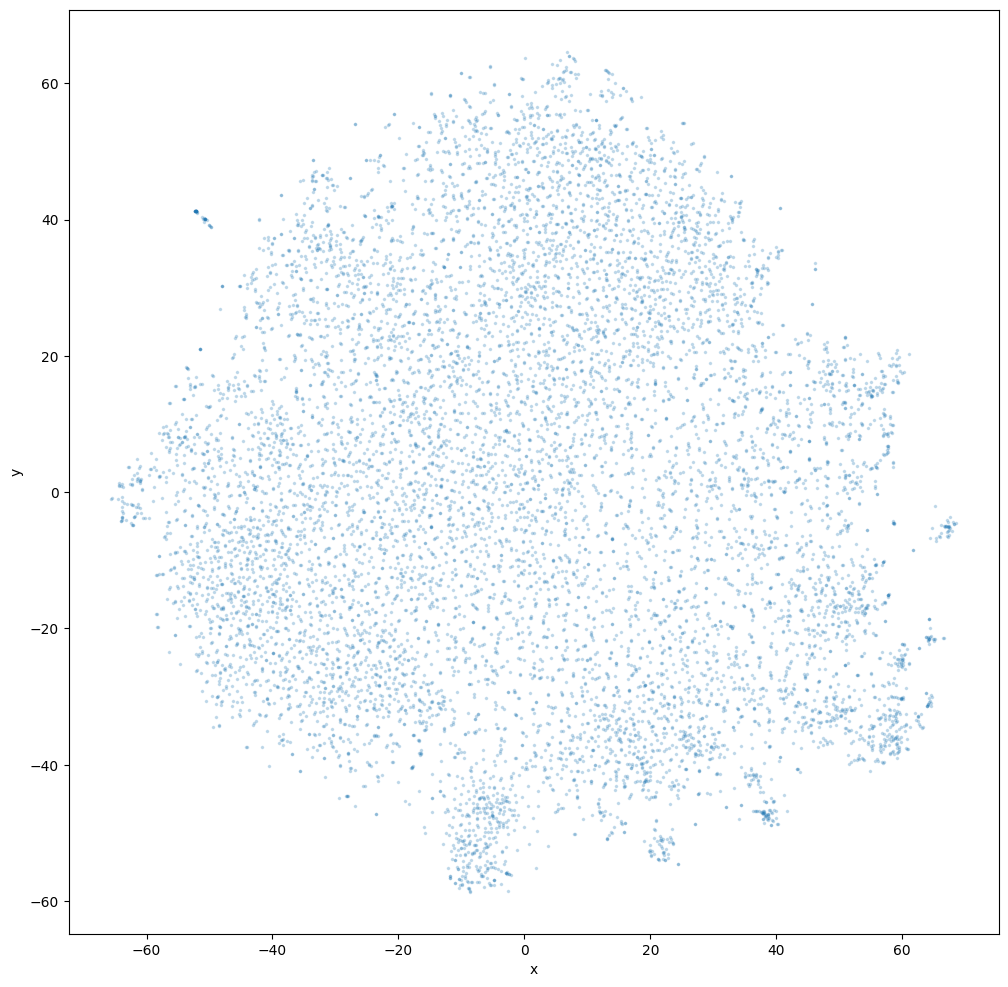

In [70]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12),
marker='.', s=10, alpha=0.2)

In [71]:
output_notebook()

### Loading BokehJS

In [74]:
subset_df = coords_df.sample(n=5000)

p = figure(width=800, height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

show(p)

Exploring in this way provides a largely subjective intrinsic evaluation of
whether related terms—and particularly synonyms—cluster together as you’d expect them
to.